# Project: Prediction for trending videos on YouTube in USA.
The objective of the project is to predict trending videos based on the number of views, likes, dislikes, number of comments, published date and trending date.

### Team: 
1. Narendra Pahuja <br>
2. Akshay Popli <br>
3. Avijit Jaiswal <br>
4. Prerana Chandrashekar <br>
5. Monika Chandrashekara <br>

### Data :
In this project we are using Trending YouTube Statistics by Mitchell J, Kaggle datasets. 
This dataset includes several months (and counting) of data on daily trending YouTube videos. Data is included for the US, GB, DE, CA, FR, RU, MX, KR, JP and IN regions (USA, Great Britain, Germany, Canada, France, Russia, Mexico, South Korea, Japan and India respectively), with up to 200 listed trending videos per day. We have selected US for our Analytics.
The dataset has following attributes:
* video_id – ID of the video
* trending_date – Date the video started to trend
* title – Title of the video 
* channel_title – Channel title of the video
* category_id – Category ID of the video 
* publish_time – Time the video was published
* tags – Places this video was tagged
* views – Number of views for the video
* likes – Number of likes for the video
* dislikes – Number of dislikes for the video
* comment_count – Number of comments for the video
* thumbnail_link – Links to thumbnail this video
* comments_disabled – States True if the comments for the video is disabled else False
* ratings_disabled – States True if the rating is disabled for the video else False
* video_error_or_removed – States True if the video has any error or if it is removed else states False.
* description – Description of the video

URL of the source: https://www.kaggle.com/datasnaek/youtube-new#USvideos.csv


###### NOTE: The plotting of data requires matplotlib, pandas, numpy, seaborn, plotly. These must be imported prior to runnung the code.

In [1]:
import numpy as np     # linear algebra
import pandas as pd    # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Reading the data:

The dailey trending videos data in United States of America is stored in file "USvideos.csv". The data from this file is read using pd.read_csv() and stored in USvideo.

In [2]:
USvideo = pd.read_csv("USvideos.csv")
Uscategory=pd.read_csv("US_category_id.csv")
Uscategory_df=Uscategory[['items__id','items__snippet__title']]


Uscategory_df.rename(columns = {'items__id':'category_id','items__snippet__title':'category_title'}, inplace = True) 

USvideo = pd.merge(USvideo, Uscategory_df, on="category_id")


#### Summary of the dataset:

The USvideo contains 16 columns and 40949 rows. 

In [3]:
USvideo.shape

(40949, 17)

#### Information of the metadata of the USvideo dataset:

From USvideo.info() we can get the following information.

Categorical variables are: video_id, trending_date, title, channel_title, publish_time, tags, thumbnail_link, description.

Numerical variables are: category_id, views, likes, dislikes, comment_count.

Boolean variables are:  comments_disabled, ratings_disabled, video_error_or_removed.

In [4]:
USvideo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40949 entries, 0 to 40948
Data columns (total 17 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
category_title            40949 non-null object
dtypes: bool(3), int64(5), object(9)
memory usage: 4.8+ MB


#### Data head pattern analysis

Using .head() the 1st 5 rows of the USvideo is displayed below for pattern analysis.

In [5]:
USvideo.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_title
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs
2,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11T15:00:03.000Z,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs
3,KODzih-pYlU,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,2017-11-11T18:08:04.000Z,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,456,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs
4,8mhTWqWlQzU,17.14.11,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,2017-11-11T01:19:33.000Z,wearing online dollar store makeup for a week|...,2744430,115426,1110,6541,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,People & Blogs


#### Describing the data columns:

Summary statistics of the USvideo dataset. Gives the record count, average value,standard deviation,minimum and maximum value, data distribution in each quantile for each column in a database.

In [6]:
USvideo.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


#### Check for null values:
Check for null values and counts the number of null values in the dataset using .isnull().sum() function.
We can observe that there are 570 null values in 'description' of the USvideo dataset as some videos may not contain description,but we are not concerned about description since we will be using tags for our analysis.

In [7]:
USvideo.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
category_title              0
dtype: int64

### Preprocessing 

__1. Fix null values present:__
The description feature of the USvideo contains 570 null values. The null values will be replaced by 'Missing description'.

In [8]:
USvideo.description.fillna("Missing description", inplace=True)
USvideo.isnull().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
category_title            0
dtype: int64

__2. Preprocess the tags column in the USvideo dataframe:__ 

In [9]:
USvideo.tags = USvideo.tags.str.replace("|", ",")
USvideo.tags = USvideo.tags.str.replace('"',"")#Replace  | w
USvideo.tags.head()

0                                      SHANtell martin
1                                  cute,cats,thai,eggs
2    shawn johnson,andrew east,shawn east,shawn and...
3    itsgrace,funny,comedy,vlog,grace,helbig,graceh...
4    wearing online dollar store makeup for a week,...
Name: tags, dtype: object

__3. The date format of trending_date and publish_time is changed:__

In [10]:
#change the formate of trending date and published time
USvideo['publish_time'] = pd.to_datetime(USvideo['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
USvideo['trending_date'] = pd.to_datetime(USvideo['trending_date'], format='%y.%d.%m',  errors='coerce')

__4. Converting trending_date and publish_time to to_datetime data type:__ 

In [11]:
# Converting Datetime to date from Object type
USvideo['trending_date'] = pd.to_datetime(USvideo['trending_date'])
USvideo['trending_date'] = USvideo['trending_date'].dt.date
USvideo['trending_date'] = pd.to_datetime(USvideo['trending_date'])

USvideo['publish_date'] = pd.to_datetime(USvideo['publish_time'])
USvideo['publish_date'] = USvideo['publish_date'].dt.date
USvideo['publish_date'] = pd.to_datetime(USvideo['publish_date'])
USvideo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40949 entries, 0 to 40948
Data columns (total 18 columns):
video_id                  40949 non-null object
trending_date             40949 non-null datetime64[ns]
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null datetime64[ns]
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40949 non-null object
category_title            40949 non-null object
publish_date              40949 non-null datetime64[ns]
dtypes: bool(3

__5. Calculate the number of dayes taken for a video to trend after being published:__

In [12]:
USvideo['NumberOfDays'] = pd.to_datetime(USvideo['trending_date']) - pd.to_datetime(USvideo['publish_date'])

USvideo['NumberOfDays'] = USvideo.NumberOfDays.dt.days
USvideo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40949 entries, 0 to 40948
Data columns (total 19 columns):
video_id                  40949 non-null object
trending_date             40949 non-null datetime64[ns]
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null datetime64[ns]
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40949 non-null object
category_title            40949 non-null object
publish_date              40949 non-null datetime64[ns]
NumberOfDays  

__6. Dropping records where publish date is greater than trending date, which is not possible:__

In [13]:
# Dropping records where publish date is greater than trending date, which is not possible.
USvideo = USvideo[USvideo['NumberOfDays'] >= 0]
USvideo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40949 entries, 0 to 40948
Data columns (total 19 columns):
video_id                  40949 non-null object
trending_date             40949 non-null datetime64[ns]
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null datetime64[ns]
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40949 non-null object
category_title            40949 non-null object
publish_date              40949 non-null datetime64[ns]
NumberOfDays  

__7.Let's start looking if Views, likes, dislikes and comment counts have a normal distribuition__

Views, likes, dislikes and comments counts have normal distribution.

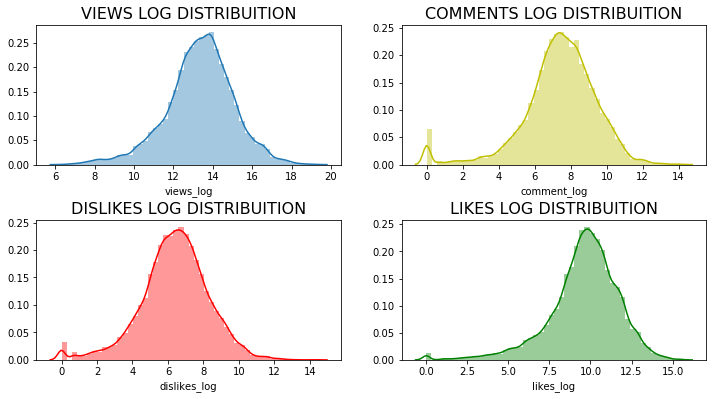

In [14]:
USvideo['likes_log'] = np.log(USvideo['likes'] + 1)
USvideo['views_log'] = np.log(USvideo['views'] + 1)
USvideo['dislikes_log'] = np.log(USvideo['dislikes'] + 1)
USvideo['comment_log'] = np.log(USvideo['comment_count'] + 1)

plt.figure(figsize = (12,6))

plt.subplot(221)
g1 = sns.distplot(USvideo['views_log'])
g1.set_title("VIEWS LOG DISTRIBUITION", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(USvideo['likes_log'],color='green')
g2.set_title('LIKES LOG DISTRIBUITION', fontsize=16)

plt.subplot(223)
g3 = sns.distplot(USvideo['dislikes_log'], color='r')
g3.set_title("DISLIKES LOG DISTRIBUITION", fontsize=16)

plt.subplot(222)
g4 = sns.distplot(USvideo['comment_log'], color = 'y')
g4.set_title("COMMENTS LOG DISTRIBUITION", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

__8. Different groups of views is created using binning:__

In [15]:
bins = [0, 100000, 500000, 1000000, 5000000, 10000000, 50000000, 100000000]
group_names = ['< 100000', '< 500000','< 1000000' , '< 5000000', '< 10000000', '< 50000000', '< 100000000']
USvideo['biningC'] = pd.cut(USvideo['views'], bins, labels=group_names)
print(USvideo.groupby('biningC').size())
USvideo.head()

biningC
< 100000        5330
< 500000       11841
< 1000000       7437
< 5000000      12578
< 10000000      1915
< 50000000      1671
< 100000000      137
dtype: int64


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,video_error_or_removed,description,category_title,publish_date,NumberOfDays,likes_log,views_log,dislikes_log,comment_log,biningC
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,...,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,2017-11-13,1,10.960027,13.525659,7.995307,9.677528,< 1000000
1,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Nobrand,22,2017-04-21 06:47:32,"cute,cats,thai,eggs",98966,2486,184,...,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs,2017-04-21,207,7.818832,11.502542,5.220356,6.278521,< 100000
2,STI2fI7sKMo,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11 15:00:03,"shawn johnson,andrew east,shawn east,shawn and...",321053,4451,1772,...,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs,2017-11-11,3,8.401109,12.679365,7.480428,6.797940,< 500000
3,KODzih-pYlU,2017-11-14,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,2017-11-11 18:08:04,"itsgrace,funny,comedy,vlog,grace,helbig,graceh...",197062,7250,217,...,False,Molly is an god damn amazing human and she cha...,People & Blogs,2017-11-11,3,8.888895,12.191279,5.384495,6.124683,< 500000
4,8mhTWqWlQzU,2017-11-14,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,2017-11-11 01:19:33,"wearing online dollar store makeup for a week,...",2744430,115426,1110,...,False,I found this online dollar store called ShopMi...,People & Blogs,2017-11-11,3,11.656394,14.825084,7.013016,8.785998,< 5000000


## Exploratory Data Analysis with summary findings

## 1. Number of videos under each category:

The graph below shows maximum number of videos in YouTube belong to category "Entertainment" followed by "Music" and "How to and Style" respectively. Minimum number of videos in YouTube belong to category 'Shows' and 'Nonprofits & Activism'.

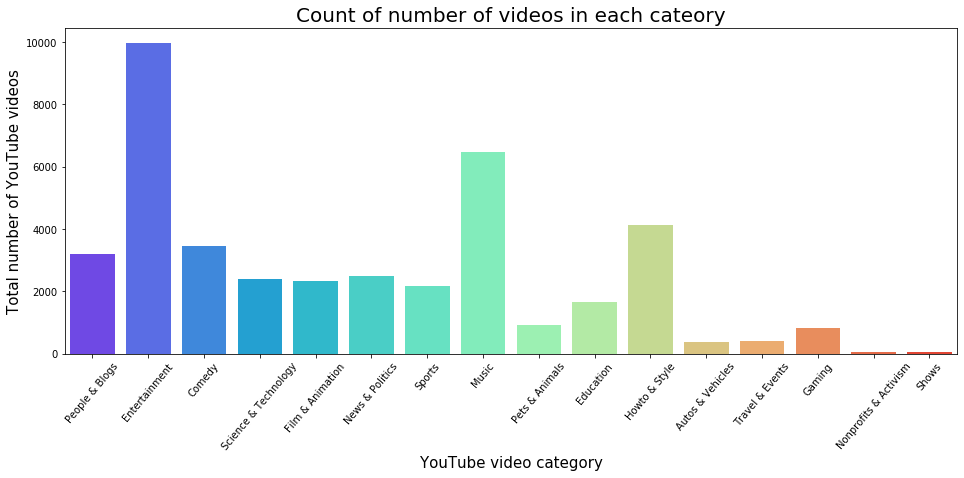

In [16]:
plt.figure(num=None, figsize=(16, 6), facecolor='w')
sns.countplot(x='category_title',data=USvideo, palette="rainbow")
plt.xticks(rotation=50)
plt.xlabel("YouTube video category", fontsize=15)
plt.ylabel('Total number of YouTube videos', fontsize=15)
plt.title('Count of number of videos in each cateory', fontsize=20)
plt.show()

## 2. Distribution of views, likes, dislikes and comments based on the category names:

Maximum number of views, likes and comments is received for video category Music. Maximum number of likes is received for video category Games.

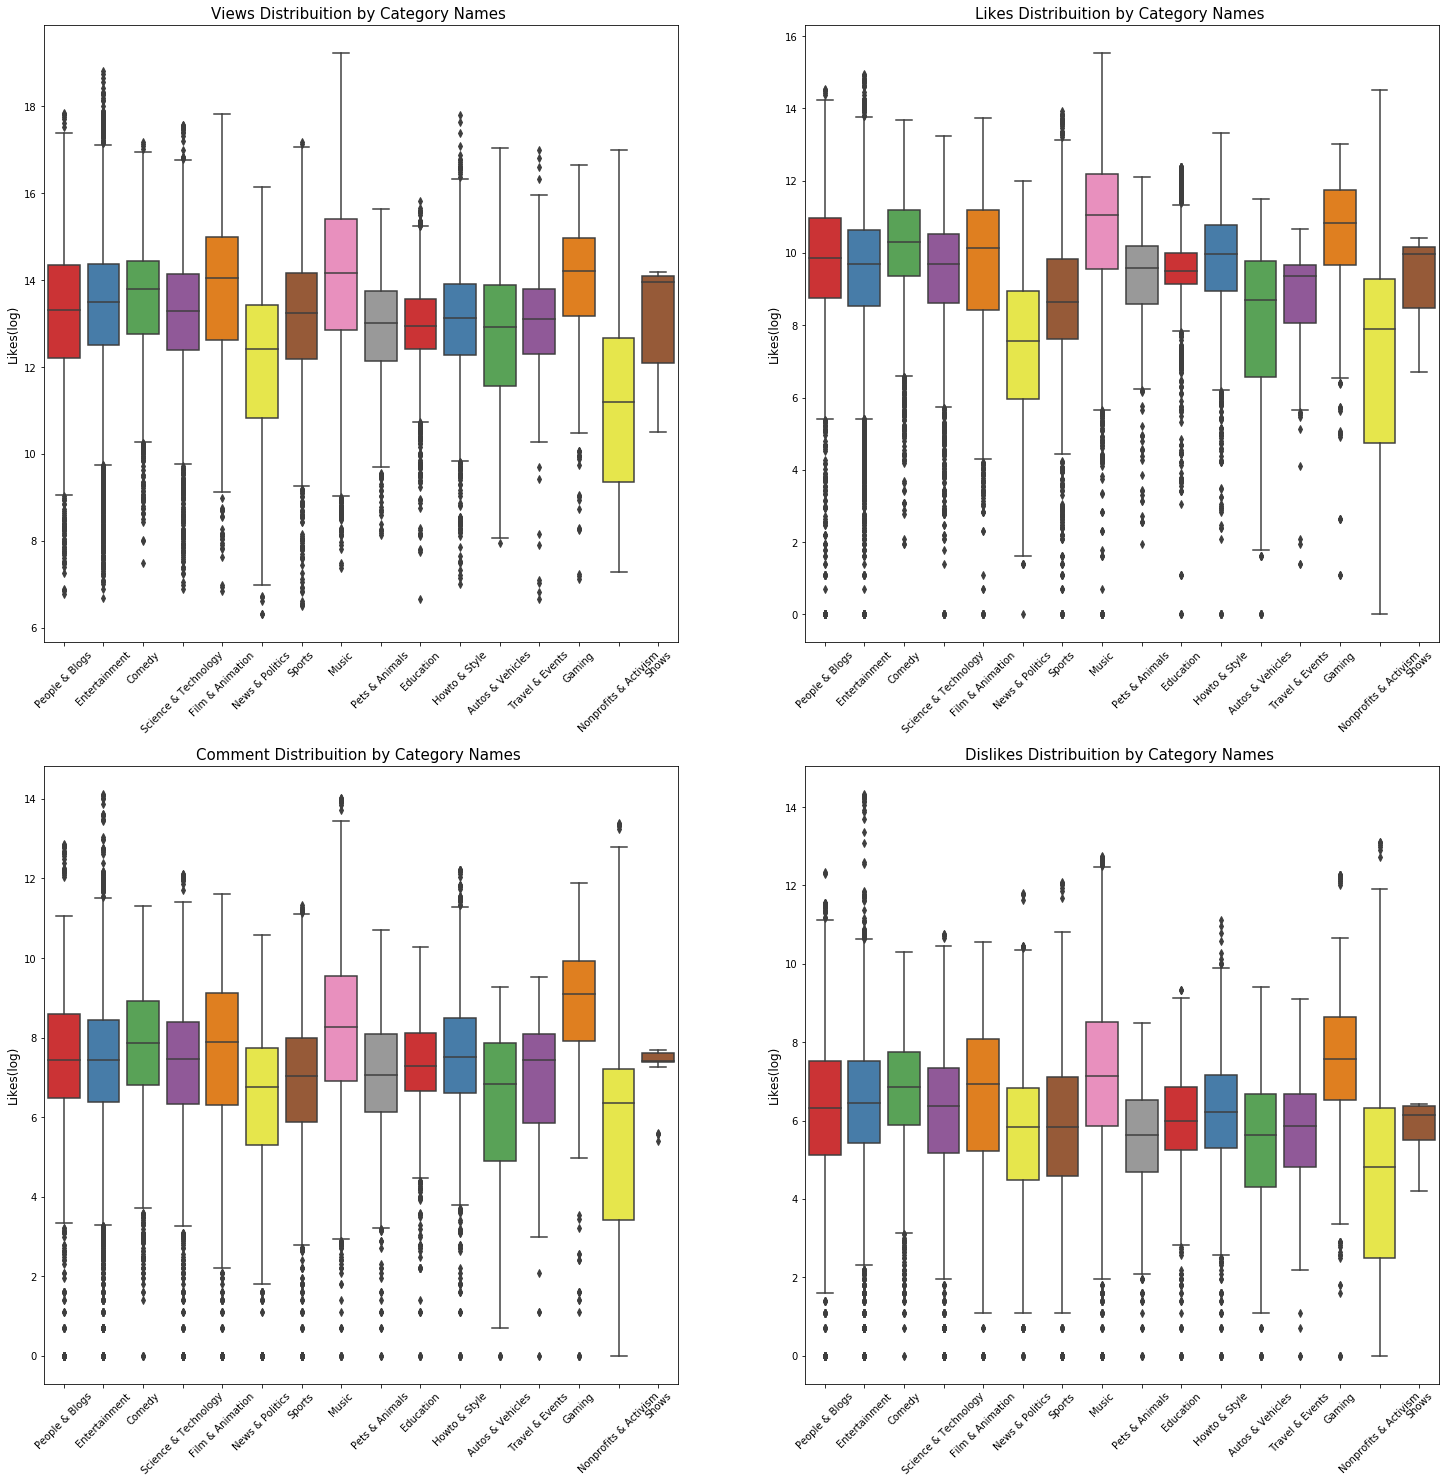

In [17]:
plt.figure(figsize = (25,25))


plt.subplot(222)
g = sns.boxplot(x='category_title', y='likes_log', data=USvideo, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Likes Distribuition by Category Names ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Likes(log)", fontsize=12)


plt.subplot(221)
g = sns.boxplot(x='category_title', y='views_log', data=USvideo, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Views Distribuition by Category Names ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Likes(log)", fontsize=12)

plt.subplot(224)
g = sns.boxplot(x='category_title', y='dislikes_log', data=USvideo, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Dislikes Distribuition by Category Names ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Likes(log)", fontsize=12)

plt.subplot(223)
g = sns.boxplot(x='category_title', y='comment_log', data=USvideo, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Comment Distribuition by Category Names ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Likes(log)", fontsize=12)


plt.show()

## 3. Different groups of views is created using binning:

From the graph below we can observe the maximum number of videos on YouTube has views greater than 1000000 and less than 5000000.  

biningC
< 100000        5330
< 500000       11841
< 1000000       7437
< 5000000      12578
< 10000000      1915
< 50000000      1671
< 100000000      137
dtype: int64


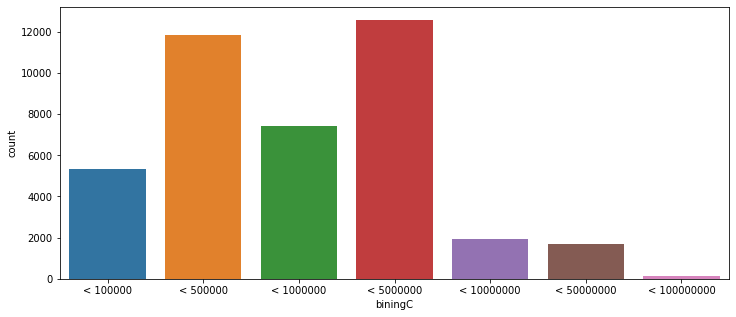

In [18]:
print(USvideo.groupby('biningC').size())
plt.figure(figsize=(12,5))
sns.countplot(x='biningC',data=USvideo)
plt.show()

## 4. Analysis:

A video on YouTube is said to be trending when it receives a large number of views. Let us consider a trending_date '2017-11-14' and store it in sub_7 dataframe. The videos having top 30 maximum views count is stored in top_videos. From top.head(10) we can observe that videos which have large number of views also have large number of likes, dislikes and comments. Let us further analyse this findings using a correlation matrix.

In [19]:
sub_7=USvideo.loc[USvideo['trending_date'].isin(['2017-11-14'])]
top_videos = sub_7.nlargest(30, ['views']) 
top = pd.DataFrame(top_videos, columns = ['title', 'trending_date', 'publish_time', 'views', 'likes', 'dislikes', 'comment_count']) 

top.head(10)

,title,trending_date,publish_time,views,likes,dislikes,comment_count
26046,Ed Sheeran - Perfect (Official Music Video),2017-11-14,2017-11-09 11:04:14,33523622,1634124,21082,85067
26039,Eminem - Walk On Water (Audio) ft. Beyoncé,2017-11-14,2017-11-10 17:00:03,17158531,787419,43420,125882
26075,Harry Styles - Kiwi,2017-11-14,2017-11-08 13:00:01,9632678,810895,16139,59473
26044,"Jennifer Lopez - Amor, Amor, Amor (Official Vi...",2017-11-14,2017-11-10 15:00:00,9548677,190083,15015,11473
35089,John Lewis Christmas Ad 2017 - #MozTheMonster,2017-11-14,2017-11-10 07:38:29,7224515,55681,10247,9479
26055,Camila Cabello - Havana (Vertical Video) ft. Y...,2017-11-14,2017-11-10 05:01:00,5476737,286268,4083,12254
13182,FIRST TIME IM DOING THIS! TALKS WITH LIZA.,2017-11-14,2017-11-10 03:43:43,3578502,307435,2573,12248
13180,When Someone Has A Crush on You | Lilly Singh,2017-11-14,2017-11-09 22:21:13,3371669,202676,3394,20086
13178,Getting My Driver's License | Lele Pons,2017-11-14,2017-11-10 18:30:01,3358068,120876,8279,6408
13174,"Racist Superman | Rudy Mancuso, King Bach & Le...",2017-11-14,2017-11-12 19:05:24,3191434,146033,5339,8181


In [20]:
USvideo_df = pd.DataFrame(USvideo) 

In [21]:
USvideo_df.drop(['video_id', 'category_id', 'likes_log',
       'views_log', 'dislikes_log', 'comment_log'], axis=1, inplace=True)
USvideo_df.head()


,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_title,publish_date,NumberOfDays,biningC
0,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,2017-11-13,1,< 1000000
1,2017-11-14,Me-O Cats Commercial,Nobrand,2017-04-21 06:47:32,"cute,cats,thai,eggs",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs,2017-04-21,207,< 100000
2,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,2017-11-11 15:00:03,"shawn johnson,andrew east,shawn east,shawn and...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs,2017-11-11,3,< 500000
3,2017-11-14,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,2017-11-11 18:08:04,"itsgrace,funny,comedy,vlog,grace,helbig,graceh...",197062,7250,217,456,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs,2017-11-11,3,< 500000
4,2017-11-14,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,2017-11-11 01:19:33,"wearing online dollar store makeup for a week,...",2744430,115426,1110,6541,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,People & Blogs,2017-11-11,3,< 5000000


## 5. Analysing the tags of each videos:

From the code below we can observe that the trending videos data set has maximum tags of __funny__ and __comedy__. The most popular tags also include __music, food, news and trailers__.

In [22]:
df=USvideo

datasetTags = []  
for i in range(len(df['tags'])): 
    val = df.iloc[i]['tags'].lower().split(',')
    for j in range(len(val)):
        datasetTags.append(val[j])  
tagsdf = pd.DataFrame(data=datasetTags)
newdf=pd.DataFrame(tagsdf.iloc[:][0].value_counts())
newdf.columns=['tags']
newdf.head(10)

,tags
funny,4142
comedy,3647
how to,1702
music,1664
pop,1634
[none],1535
trailer,1413
food,1280
2018,1275
news,1254


## 6. Correlation graph:


The correlation graph below shows that views has highest correlation with 'likes'=0.85, followed by 'dislikes' = 0.47 and 'comment_count' = 0.62. From this we can conclude 'views' is highly correlated with 'likes', 'dislikes'and 'comment_count'.

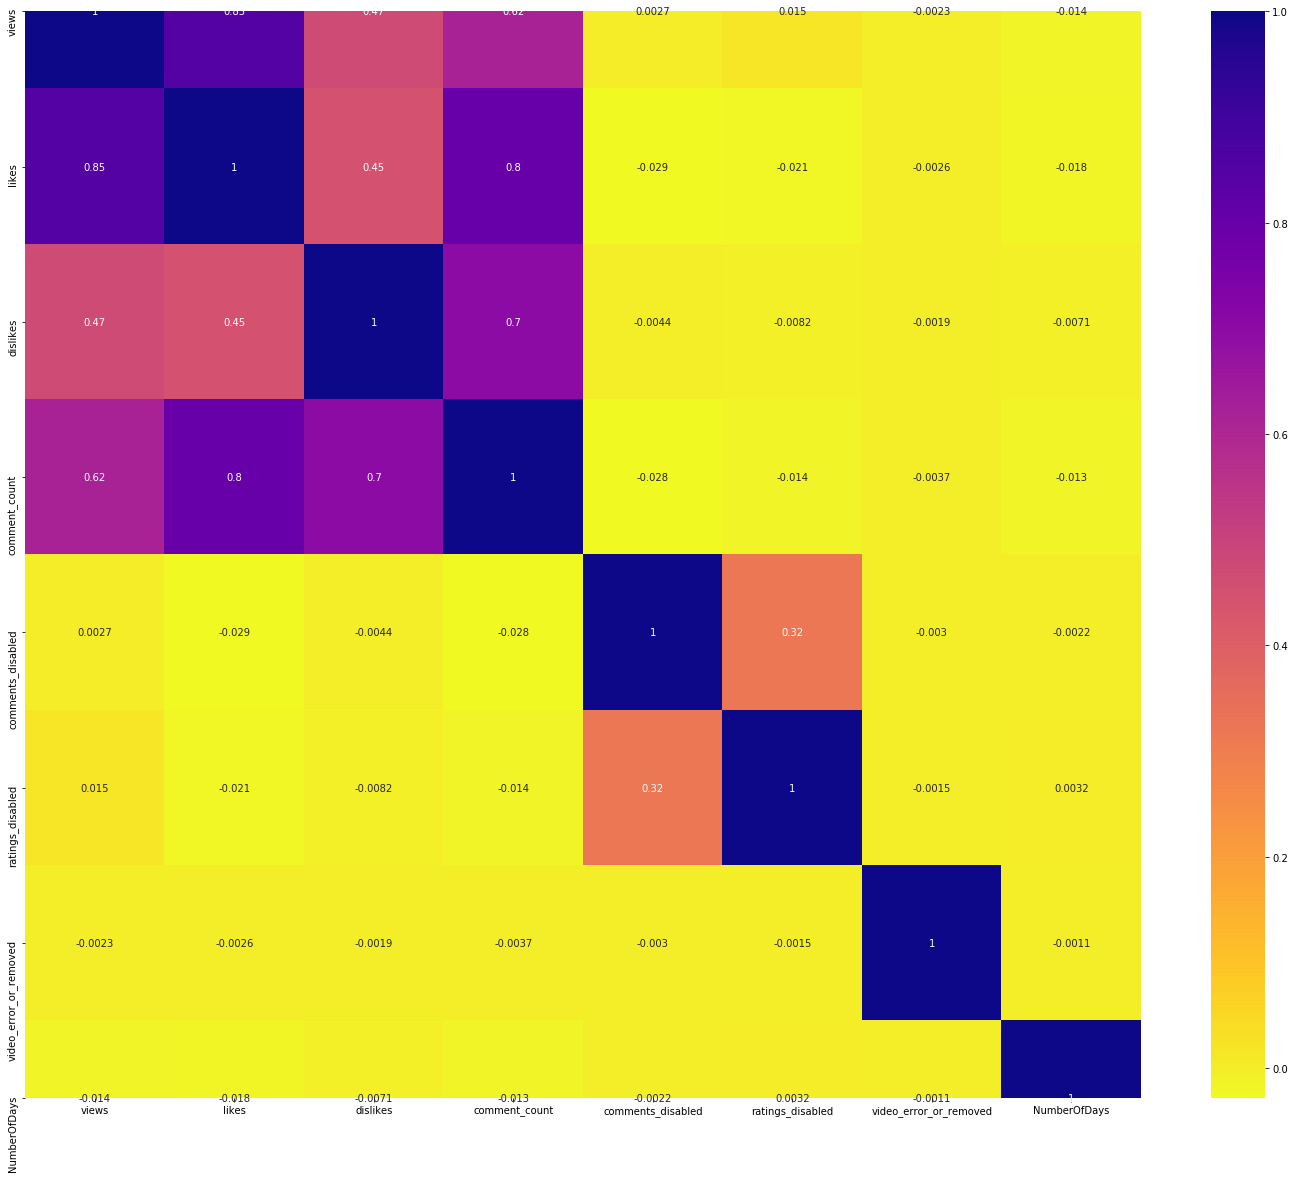

In [23]:
plt.figure(figsize=(25,20))
sns.heatmap(USvideo_df.corr(),annot=True,cmap='plasma_r')
plt.show()

## 7. Determining the category of video based on number of days between published date and trending date:

__Video published:__ Maximum number of video in the data set are published in the year 2017 and 2018. 

In [24]:
USvideo['publish_time_year'] = USvideo['publish_time'].dt.year
USvideo.groupby('publish_time_year').size().sort_values(ascending=False)

publish_time_year
2018    30279
2017    10428
2013       44
2016       35
2015       35
2014       32
2011       27
2012       24
2010       19
2009       14
2008       11
2006        1
dtype: int64

__Video trending:__ The data set contain videos that are trending in the year 2017 and 2018.

In [25]:
USvideo['trending_date_year'] = USvideo['trending_date'].dt.year
USvideo.groupby('trending_date_year').size().sort_values(ascending=False)

trending_date_year
2018    31349
2017     9600
dtype: int64

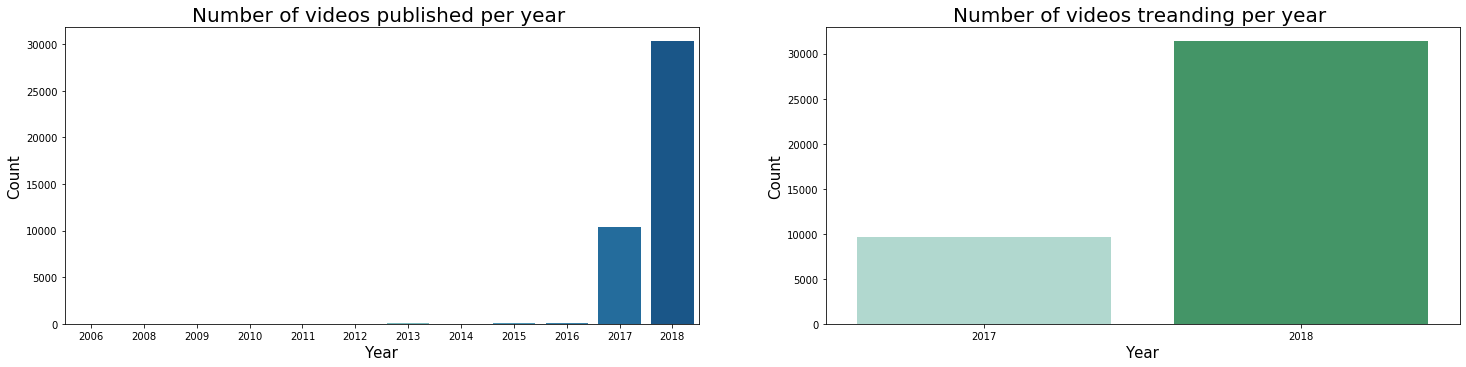

In [26]:
plt.figure(figsize = (25,12))

plt.subplot(221)
g = sns.countplot(x = 'publish_time_year', data=USvideo, palette="GnBu")
g.set_xticklabels(g.get_xticklabels())
g.set_title("Number of videos published per year ", fontsize=20)
g.set_xlabel("Year", fontsize=15)
g.set_ylabel("Count", fontsize=15)

plt.subplot(222)
g = sns.countplot(x = 'trending_date_year', data=USvideo, palette="BuGn")
g.set_xticklabels(g.get_xticklabels())
g.set_title("Number of videos treanding per year ", fontsize=20)
g.set_xlabel("Year", fontsize=15)
g.set_ylabel("Count", fontsize=15)

plt.show()

### Number of days between video published and video trending is greater than 500

__There are a total of 222 videos where NumberOfDays is greater than 500. Maximum number of these videos belong to the category of Film & Animation or Entertainment followed by Education or People & Blogs. Minimum number of videos belong to categories Comedy, Gaming and Howto & Style.__

In [27]:
print(USvideo.NumberOfDays.value_counts().head(20))
trending_most = USvideo[USvideo['NumberOfDays'] > 500]

4     4694
3     4643
5     4584
2     4303
6     4038
7     3126
1     2847
8     2184
9     1657
10    1370
11    1198
12    1082
13     938
14     793
15     608
16     471
17     396
18     312
19     222
20     178
Name: NumberOfDays, dtype: int64


In [28]:
trending_most.shape

(222, 26)

In [29]:
print(trending_most.category_title.value_counts().head(21))

Film & Animation        41
Entertainment           40
Education               25
People & Blogs          20
Sports                  19
Music                   18
News & Politics         15
Science & Technology    14
Autos & Vehicles        13
Comedy                   8
Gaming                   6
Howto & Style            3
Name: category_title, dtype: int64


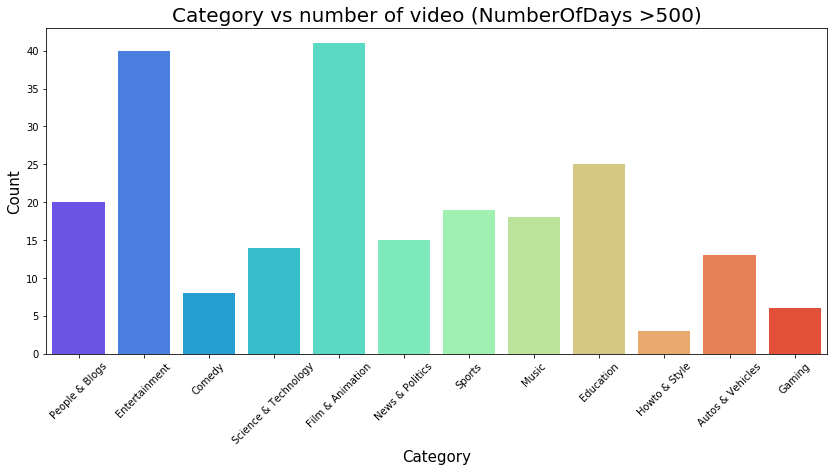

In [30]:
plt.figure(figsize = (14,6))
g = sns.countplot(x = 'category_title', data=trending_most, palette="rainbow")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Category vs number of video (NumberOfDays >500)", fontsize=20)
g.set_xlabel("Category", fontsize=15)
g.set_ylabel("Count", fontsize=15)
plt.show()

### Category of videos that trend on the day of publish 
__There are a total of 121 videos where NumberOfDays is 0. Maximum number of these videos belong to the category Entertainment  followed by Music.__

In [31]:
USvideo_0 = USvideo[USvideo['NumberOfDays'] == 0]
print(USvideo_0.shape)

(121, 26)


Text(0, 0.5, 'Count')

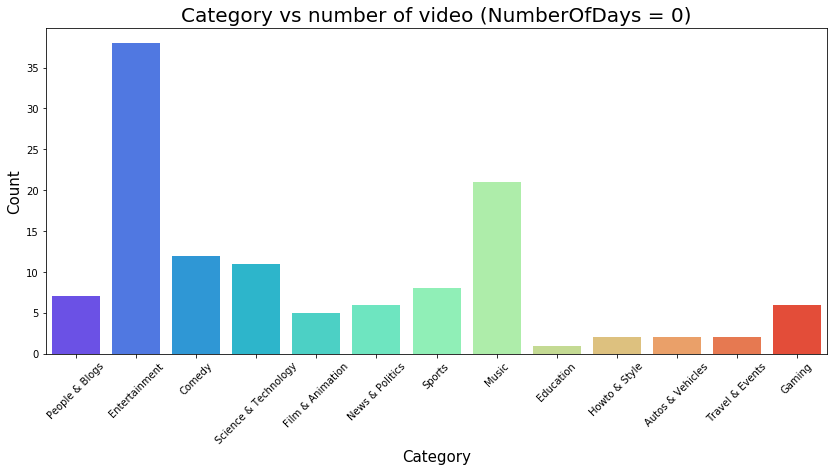

In [32]:
plt.figure(figsize = (14,6))

g = sns.countplot(x = 'category_title', data=USvideo_0, palette="rainbow")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Category vs number of video (NumberOfDays = 0)", fontsize=20)
g.set_xlabel("Category", fontsize=15)
g.set_ylabel("Count", fontsize=15)

__The number of views videos that trend on the day of publish is analyzed.__

From the figure above we observe that only a small portion of videos get likes in the range 1000000 to 5000000.

biningC
< 100000       61
< 500000       33
< 1000000      14
< 5000000      13
< 10000000      0
< 50000000      0
< 100000000     0
dtype: int64


Text(0, 0.5, 'Count')

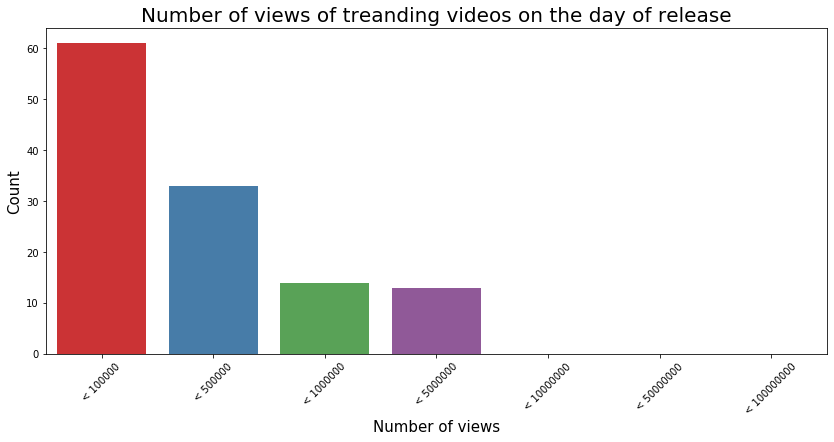

In [33]:
print(USvideo_0.groupby('biningC').size())
plt.figure(figsize = (14,6))

g = sns.countplot(x = 'biningC', data=USvideo_0, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Number of views of treanding videos on the day of release", fontsize=20)
g.set_xlabel("Number of views", fontsize=15)
g.set_ylabel("Count", fontsize=15)

__Category of videos that get more than 100000 views on the day of release are Film & Animation and Gaming.__

In [34]:
USvideo_0_bin = USvideo_0[USvideo_0['biningC'] == '< 5000000']
#USvideo_0_bin.head()

category_title
Autos & Vehicles        1
Entertainment           2
Film & Animation        3
Gaming                  3
Music                   2
Science & Technology    1
Sports                  1
dtype: int64


Text(0, 0.5, 'Count')

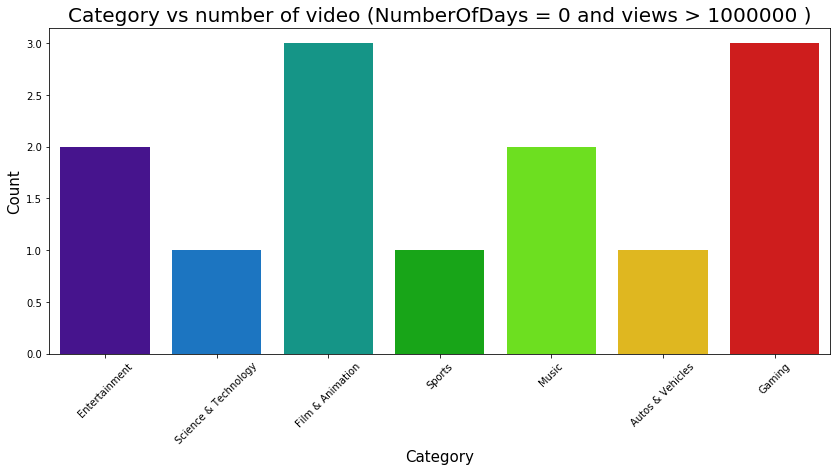

In [35]:
print(USvideo_0_bin.groupby('category_title').size())
plt.figure(figsize = (14,6))


g = sns.countplot(x = 'category_title', data=USvideo_0_bin, palette="nipy_spectral")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Category vs number of video (NumberOfDays = 0 and views > 1000000 )", fontsize=20)
g.set_xlabel("Category", fontsize=15)
g.set_ylabel("Count", fontsize=15)

### Number of days between video published and video trending is equal to 1

__There are a total of 2847 videos where NumberOfDays is  equal to 1. Maximum number of these videos belong to the category of Entertainment and Music.__

In [36]:
# Filtering the dataset for obtaining the data of all Non USA countries
USvideo_1 = USvideo[USvideo['NumberOfDays'] == 1]
print(USvideo_1.shape)

(2847, 26)


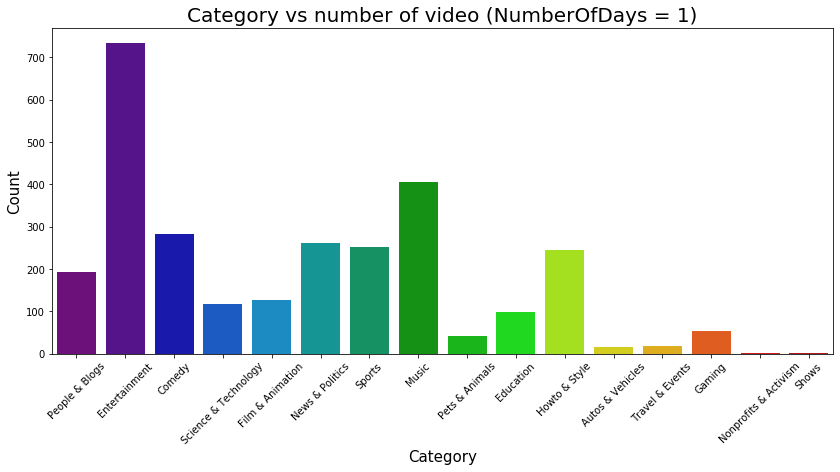

In [37]:
plt.figure(figsize = (14,6))


g = sns.countplot(x = 'category_title', data=USvideo_1, palette="nipy_spectral")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Category vs number of video (NumberOfDays = 1)", fontsize=20)
g.set_xlabel("Category", fontsize=15)
g.set_ylabel("Count", fontsize=15)
plt.show()

__Maximum number of likes videos that trend 1 day from publishing is between 100000 and 500000.__

Text(0, 0.5, 'Count')

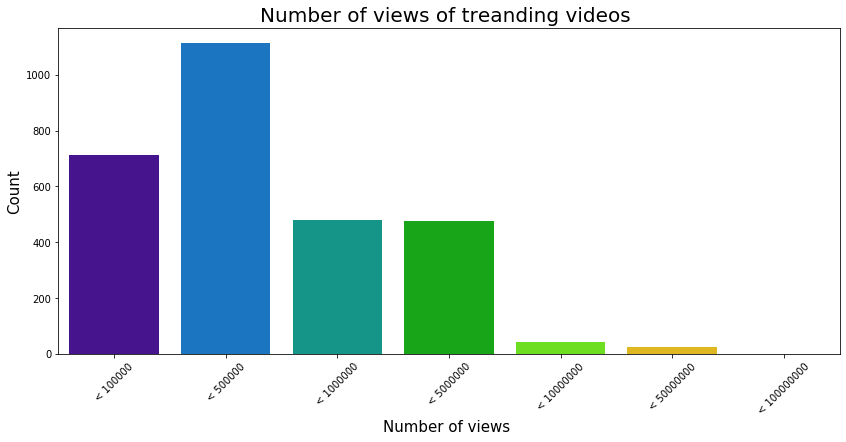

In [38]:
plt.figure(figsize = (14,6))


g = sns.countplot(x = 'biningC', data=USvideo_1, palette="nipy_spectral")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Number of views of treanding videos ", fontsize=20)
g.set_xlabel("Number of views ", fontsize=15)
g.set_ylabel("Count", fontsize=15)

__Category type of videos that trend 1 day after publishing having maximum number of views belong to Music.__

In [39]:
USvideo_1_bin = USvideo_1[USvideo_1['views'] > 5000000]
#USvideo_1_bin.head()

category_title
Autos & Vehicles          1
Comedy                    2
Entertainment            17
Film & Animation          6
Gaming                    3
Howto & Style             1
Music                    27
Nonprofits & Activism     1
People & Blogs            2
Science & Technology      2
Sports                    4
dtype: int64


Text(0, 0.5, 'Count')

<Figure size 1008x432 with 0 Axes>

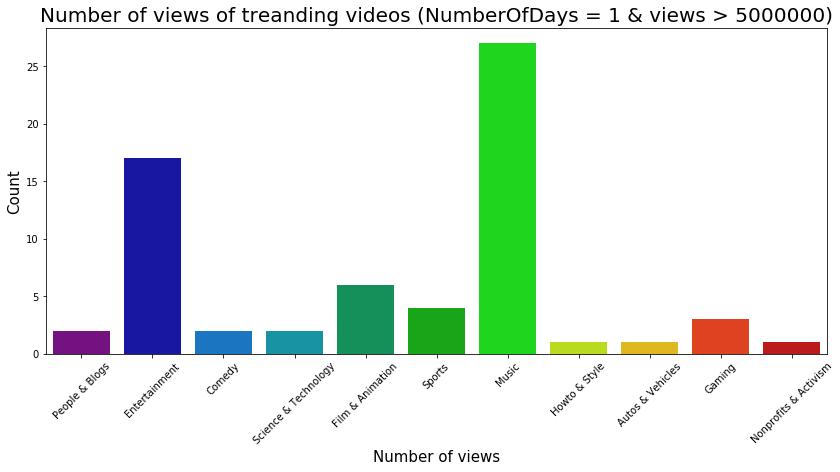

In [40]:
print(USvideo_1_bin.groupby('category_title').size())
plt.figure(figsize = (14,6))

plt.figure(figsize = (14,6))


g = sns.countplot(x = 'category_title', data=USvideo_1_bin, palette="nipy_spectral")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Number of views of treanding videos (NumberOfDays = 1 & views > 5000000)", fontsize=20)
g.set_xlabel("Number of views", fontsize=15)
g.set_ylabel("Count", fontsize=15)

## 8. Analysis based on month of video published and month of video trending:

__Total number of videos published per month:__

The graph below shows the number of videos published based on month. We can observe the number of videos published from June to November is minimal compared to the rest of the year.

__Treanding videos based on month:__

The graph shows number of videos trending based on month. There are no videos trending in the month of July, August, September and October. We have also observed that there are very few videos published during these months. 


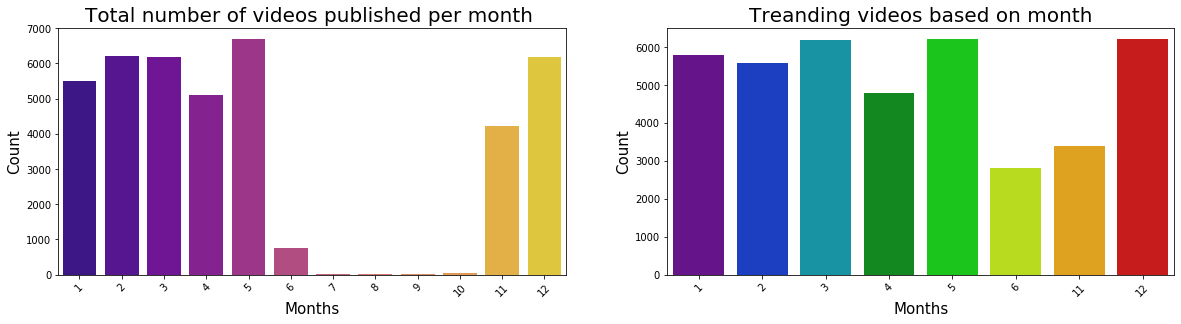

In [41]:
USvideo['publish_time_month'] = USvideo['publish_time'].dt.month
USvideo['trending_date_month'] = USvideo['trending_date'].dt.month

plt.figure(figsize = (20,10))
plt.subplot(221)
g = sns.countplot(x = 'publish_time_month', data=USvideo, palette="plasma")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Total number of videos published per month ", fontsize=20)
g.set_xlabel("Months", fontsize=15)
g.set_ylabel("Count", fontsize=15)


plt.subplot(222)
g = sns.countplot(x = 'trending_date_month', data=USvideo, palette="nipy_spectral")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Treanding videos based on month", fontsize=20)
g.set_xlabel("Months", fontsize=15)
g.set_ylabel("Count", fontsize=15)

plt.show()

## 9. Number of videos published based on the time of the day:

We can observe from the graph below maximum number of videos are published 2pm to 6pm.

Text(0, 0.5, 'Count')

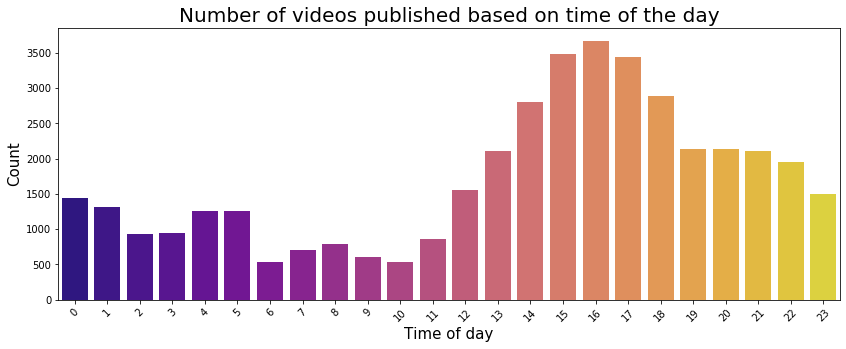

In [42]:
USvideo['publish_time_hour'] = USvideo['publish_time'].dt.hour

plt.figure(figsize = (14,5))


g = sns.countplot(x = 'publish_time_hour', data=USvideo, palette="plasma")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Number of videos published based on time of the day", fontsize=20)
g.set_xlabel("Time of day", fontsize=15)
g.set_ylabel("Count", fontsize=15)


## 10. Number of videos published and videos trending based on day of the week:

__The number of videos published during the weekend is less than videos published during weekday. But the number of videos trending is not affected by the day of the week.__


In [43]:
USvideo['day_published'] = USvideo['publish_date'].dt.weekday_name
USvideo['day_trending'] = USvideo['trending_date'].dt.weekday_name

Text(0, 0.5, 'Count')

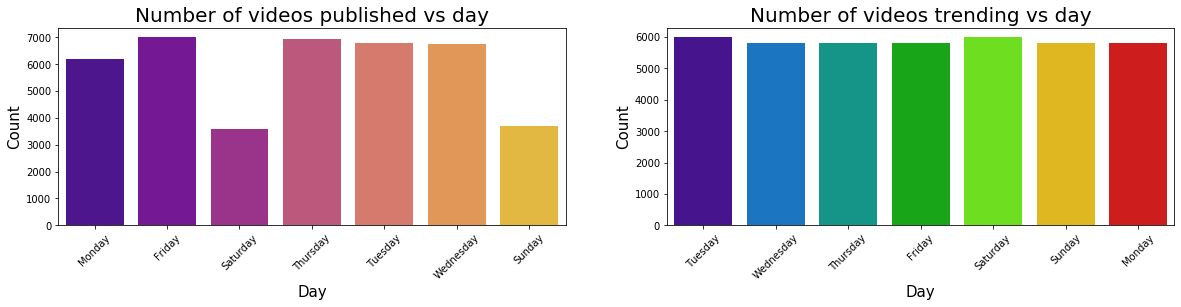

In [44]:
plt.figure(figsize = (20,8))

plt.subplot(221)
g = sns.countplot(x = 'day_published', data=USvideo, palette="plasma")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Number of videos published vs day", fontsize=20)
g.set_xlabel("Day", fontsize=15)
g.set_ylabel("Count", fontsize=15)

plt.subplot(222)
g = sns.countplot(x = 'day_trending', data=USvideo, palette="nipy_spectral")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Number of videos trending vs day", fontsize=20)
g.set_xlabel("Day", fontsize=15)
g.set_ylabel("Count", fontsize=15)

## 11. Analysis of videos published on Monday:

In [45]:
USvideo_monday = USvideo[USvideo['day_published'] == 'Monday']
#USvideo_monday.head()

In [46]:
#There are 6177 videos published on Monday
USvideo_monday.shape

(6177, 31)

Videos published on monday trends on all the days of the week. 

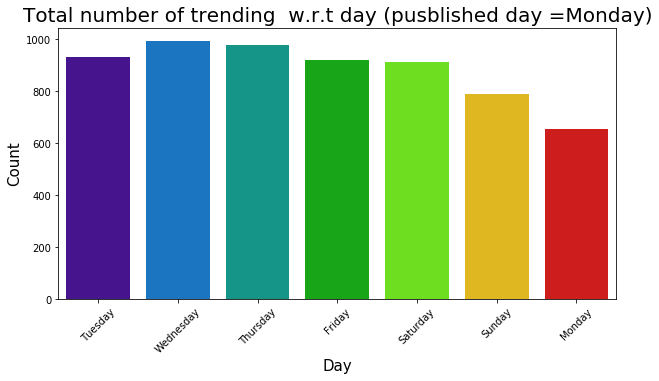

In [47]:
plt.figure(figsize = (10,5))
g = sns.countplot(x = 'day_trending', data=USvideo_monday, palette="nipy_spectral")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Total number of trending  w.r.t day (pusblished day =Monday)", fontsize=20)
g.set_xlabel("Day", fontsize=15)
g.set_ylabel("Count", fontsize=15)
plt.show()

Maximum number of videos published on Monday belong to Entertainment category.

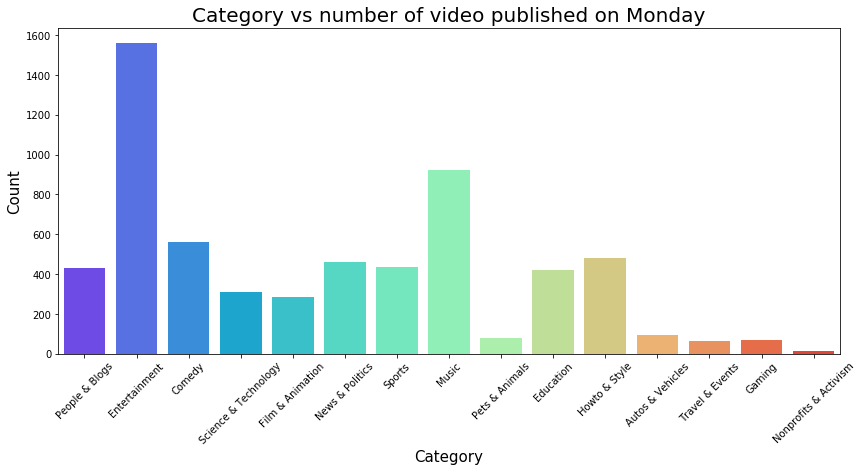

In [48]:
plt.figure(figsize = (14,6))
g = sns.countplot(x = 'category_title', data=USvideo_monday, palette="rainbow")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Category vs number of video published on Monday", fontsize=20)
g.set_xlabel("Category", fontsize=15)
g.set_ylabel("Count", fontsize=15)
plt.show()

Maximum videos published on Monday have number of views greater than 100000 and less than 500000.

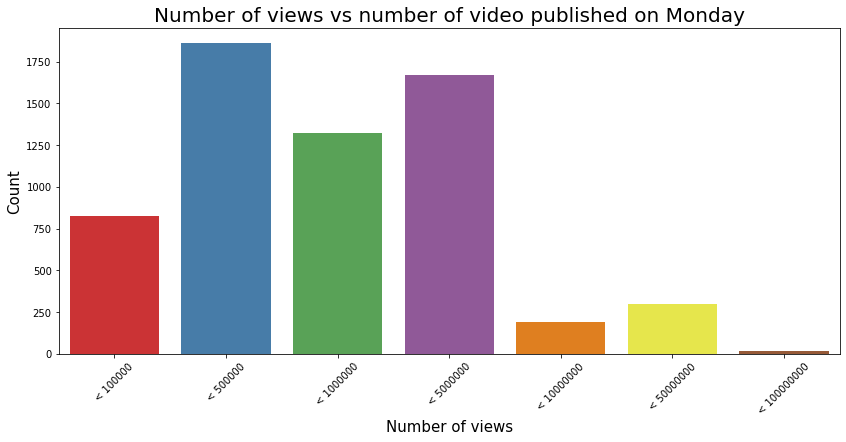

In [49]:
plt.figure(figsize = (14,6))
g = sns.countplot(x = 'biningC', data=USvideo_monday, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Number of views vs number of video published on Monday", fontsize=20)
g.set_xlabel("Number of views", fontsize=15)
g.set_ylabel("Count", fontsize=15)
plt.show()

18 videos published on Monday have number of views greater than 50000000 and less than 100000000. 10 videos have title __TWICE What is Love? M/V__ and 8 videos have title __Taylor Swift - Delicate.__ These 18 videos belong to __Music__ category. Number of days between trending and publish varies from __8 to 18__.

In [50]:
USvideo_monday_bin_1 = USvideo_monday[USvideo_monday['biningC'] == '< 100000000']
USvideo_monday_bin_1
print(USvideo_monday_bin_1.groupby('biningC').size())

biningC
< 100000        0
< 500000        0
< 1000000       0
< 5000000       0
< 10000000      0
< 50000000      0
< 100000000    18
dtype: int64


In [51]:
print(USvideo_monday_bin_1.groupby('title').size())

title
TWICE What is Love? M/V    10
Taylor Swift - Delicate     8
dtype: int64


In [52]:
print(USvideo_monday_bin_1.groupby('category_title').size())

category_title
Music    18
dtype: int64


In [53]:
print(USvideo_monday_bin_1.groupby('NumberOfDays').size())

NumberOfDays
8     1
9     2
10    2
11    2
12    2
13    2
14    2
15    2
16    1
17    1
18    1
dtype: int64


296 videos published on Monday have number of views greater than and less 10000000 than 50000000. Most of these videos belong to category __Music__ or __Sports__. Most videos have number of days between trending and published between __3 to 8__.

In [54]:
USvideo_monday_bin = USvideo_monday[USvideo_monday['biningC'] == '< 50000000']
print(USvideo_monday_bin.groupby('biningC').size())

biningC
< 100000         0
< 500000         0
< 1000000        0
< 5000000        0
< 10000000       0
< 50000000     296
< 100000000      0
dtype: int64


In [55]:
print(USvideo_monday_bin.groupby('category_title').size())

category_title
Autos & Vehicles     11
Entertainment        38
Film & Animation     21
Gaming                1
Music               108
News & Politics       2
People & Blogs        1
Sports              114
dtype: int64


In [56]:
print(USvideo_monday_bin.groupby('NumberOfDays').size())

NumberOfDays
1      4
2     17
3     23
4     22
5     27
6     29
7     27
8     26
9     17
10    16
11    13
12    14
13    12
14    11
15     9
16     3
17     3
18     3
19     2
20     2
21     3
22     2
23     2
24     2
25     1
26     2
27     2
28     2
dtype: int64


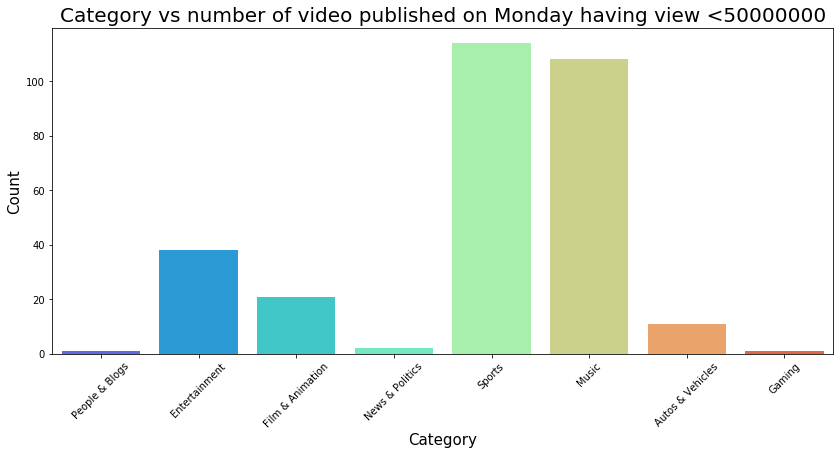

In [57]:
plt.figure(figsize = (14,6))
g = sns.countplot(x = 'category_title', data=USvideo_monday_bin, palette="rainbow")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Category vs number of video published on Monday having view <50000000", fontsize=20)
g.set_xlabel("Category", fontsize=15)
g.set_ylabel("Count", fontsize=15)
plt.show()

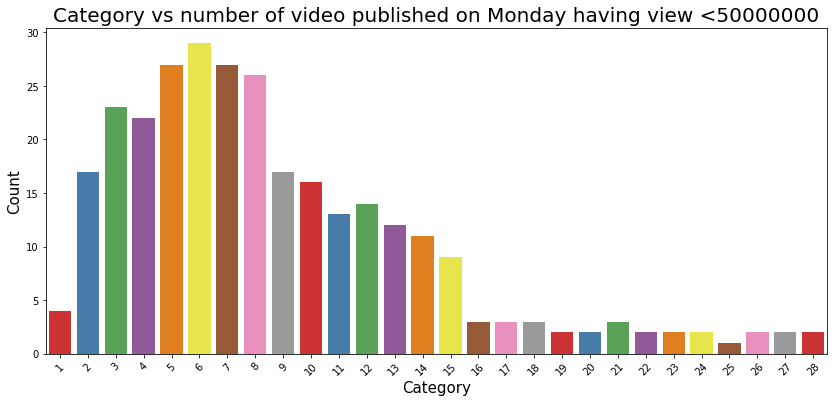

In [58]:
plt.figure(figsize = (14,6))
g = sns.countplot(x = 'NumberOfDays', data=USvideo_monday_bin, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Category vs number of video published on Monday having view <50000000", fontsize=20)
g.set_xlabel("Category", fontsize=15)
g.set_ylabel("Count", fontsize=15)
plt.show()

## Predicing number of views for trending videos based on number of likes, dislikes and comments using Random Forest Regression

In [59]:
#USvideo_df = USvideo.sample(20000)
X = USvideo[['likes','dislikes','comment_count']]
y = USvideo['views']

In [60]:
from sklearn.model_selection import train_test_split

# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,roc_curve, confusion_matrix


randomForest = RandomForestRegressor(n_estimators=200,max_depth=15)
randomForest.fit(X_train, y_train)

y_pred = randomForest.predict(X_test)

print("Training Accuracy :", randomForest.score(X_train, y_train))
print("Testing Accuracy :", randomForest.score(X_test, y_test))

Training Accuracy : 0.9788589224402733
Testing Accuracy : 0.9286380960514093


In [61]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 605987.338313988
Mean Squared Error: 3878995952705.482
Root Mean Squared Error: 1969516.679976456


In [62]:
# Performance metrics
errors = abs(y_pred - y_test)
#print(errors)

#print('Metrics for Random Forest Trained on Original Data')
#print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Accuracy: 97.74 %.


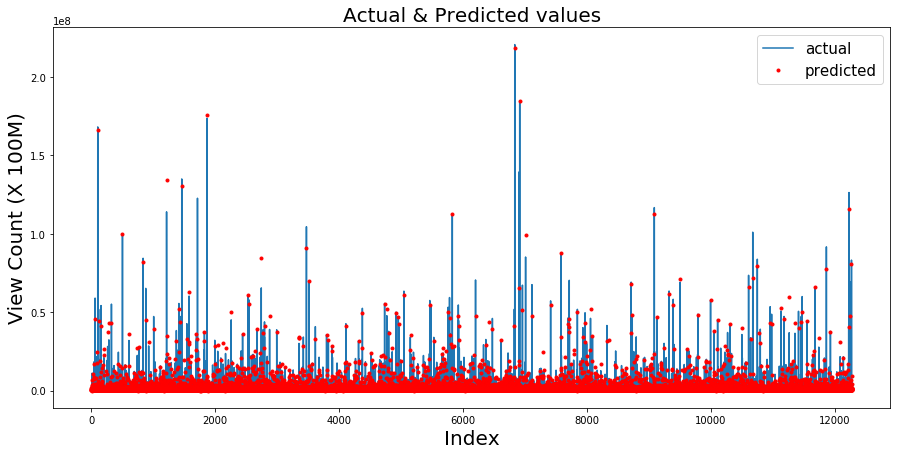

In [63]:
ser=list(np.arange(0,12285,1))
plt.figure(figsize=(15,7))
plt.xlabel('Index', fontsize = 20)
plt.ylabel('View Count (X 100M)', fontsize = 20)
plt.plot(ser,y_test,label='actual')
plt.plot(ser,y_pred,'r.',label='predicted')
plt.title('Actual & Predicted values', fontsize = 20)
plt.legend(fontsize = 15)
plt.show()

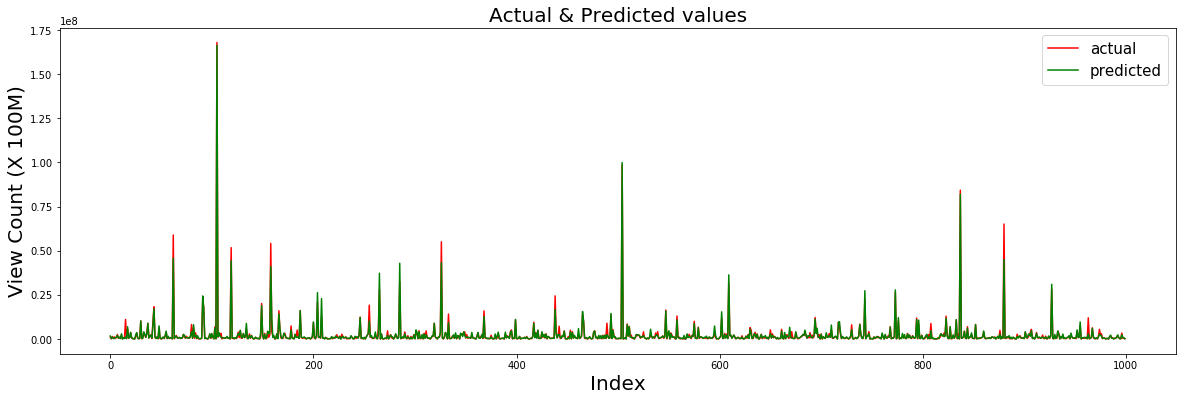

In [64]:
ser=list(np.arange(0,12285,1))
plt.figure(figsize=(20,6))
plt.xlabel('Index', fontsize = 20)
plt.ylabel('View Count (X 100M)', fontsize = 20)
plt.plot(ser[0:1000],y_test[0:1000],label='actual', color ='r')
plt.plot(ser[0:1000],y_pred[0:1000],label='predicted', color = 'g')

plt.title('Actual & Predicted values', fontsize = 20)
plt.legend(fontsize = 15)
plt.show()

## Predicing number of views for trending videos based on number of likes, dislikes and comments using Linear Regression

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_predict = lin_model.predict(X_test)

print("Training Accuracy :", lin_model.score(X_train, y_train))
print("Testing Accuracy :", lin_model.score(X_test, y_test))

Training Accuracy : 0.7909052481630545
Testing Accuracy : 0.764443152357094


In [66]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))


Mean Absolute Error: 1220332.84307086
Mean Squared Error: 12804087448355.426
Root Mean Squared Error: 3578279.9566768706


In [67]:
# Performance metrics
errors = abs(y_predict - y_test)
#print(errors)

#print('Metrics for Random Forest Trained on Original Data')
#print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Accuracy: 97.18 %.


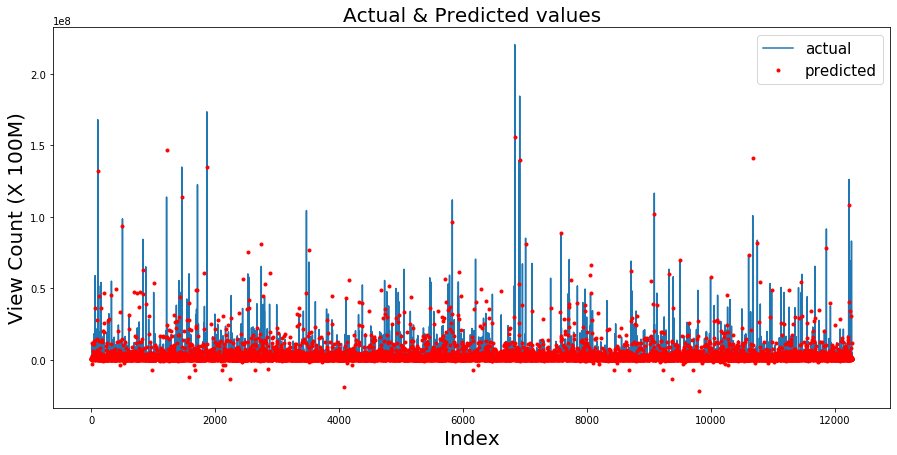

In [68]:
ser=list(np.arange(0,12285,1))
plt.figure(figsize=(15,7))
plt.xlabel('Index', fontsize = 20)
plt.ylabel('View Count (X 100M)', fontsize = 20)
plt.plot(ser,y_test,label='actual')
plt.plot(ser,y_predict,'r.',label='predicted')
plt.title('Actual & Predicted values', fontsize = 20)
plt.legend(fontsize = 15)
plt.show()

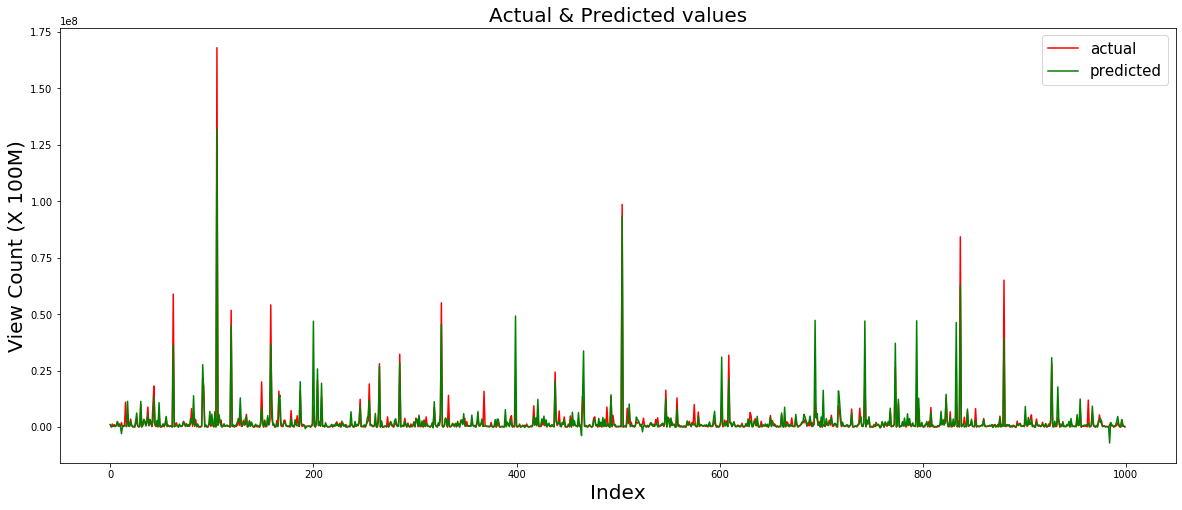

In [69]:
ser=list(np.arange(0,12285,1))
plt.figure(figsize=(20,8))
plt.xlabel('Index', fontsize = 20)
plt.ylabel('View Count (X 100M)', fontsize = 20)
plt.plot(ser[0:1000],y_test[0:1000],label='actual', color = 'r')
plt.plot(ser[0:1000],y_predict[0:1000],label='predicted', color = 'g')

plt.title('Actual & Predicted values', fontsize = 20)
plt.legend(fontsize = 15)
plt.show()

## Conclusion:

YouTube trending video data set is analyzed in this project. Random Forest Regression and logistic regression are used to predict the number of views for trending videos. For both __Random Forest Regression__ and __Logistic Regression__ the accuracy of the training and test set is almost equal, from this we can say the model is not overfit or underfit. The accuracy for predicting the number of views is high for both __Random Forest Regression__ (97.74 %) and __Logistic Regression__ (97.18 %). Since the accuracy is greater for __Random Forest Regression__ , it is best model to predict the number of views for YouTube trending data set.